In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Load the base model (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,  # Adjust epochs as necessary
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]  # Include early stopping
)

# Save the model
model.save('cifar10_classification_model.h5')



Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 973s 621ms/step - accuracy: 0.2663 - loss: 2.0470 - val_accuracy: 0.4823 - val_loss: 1.5249
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 975s 617ms/step - accuracy: 0.4616 - loss: 1.5510 - val_accuracy: 0.5176 - val_loss: 1.3973
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 907s 581ms/step - accuracy: 0.4983 - loss: 1.4418 - val_accuracy: 0.5340 - val_loss: 1.3393
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 982s 619ms/step - accuracy: 0.5216 - loss: 1.3778 - val_accuracy: 0.5474 - val_loss: 1.3003
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 987s 623ms/step - accuracy: 0.5373 - loss: 1.3367 - val_accuracy: 0.5552 - val_loss: 1.2728


Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

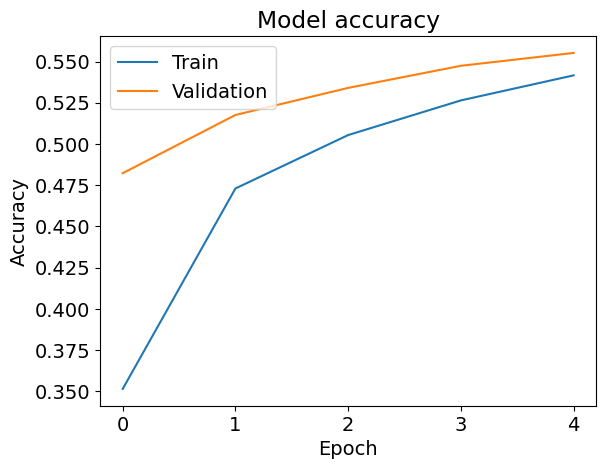

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

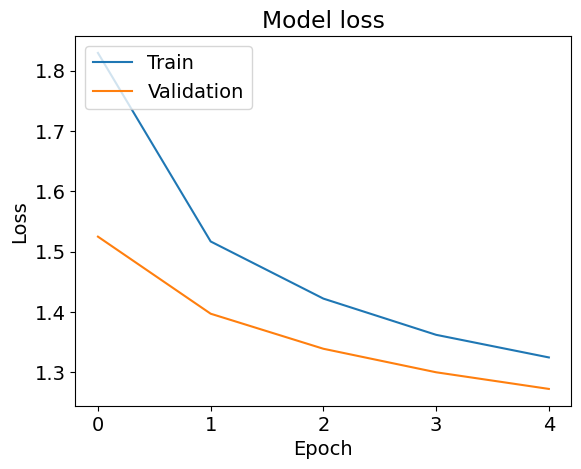

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
